# Lending Club Case Study

In [1]:
#Importing pandas
import pandas as pd

In [2]:
# Reading the dataset into a DataFrame
original_df = pd.read_csv("loan.csv")

C:\Users\shahp\AppData\Local\Temp\ipykernel_7848\4158003575.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  original_df = pd.read_csv("loan.csv")


In [3]:
#Displaying first 5 rows of the dataframe
original_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
original_df.shape

(39717, 111)

In [6]:
original_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [7]:
# Creating a copy of the original DataFrame
df = original_df.copy()

In [8]:
#Can see lots of columns having NaN values.
num_columns_with_all_null = df.isnull().all().sum()
print(f"There are {num_columns_with_all_null} columns with all values null")

There are 54 columns with all values null


In [9]:
#Deleting all the columns with null values null
df.dropna(axis=1, how='all', inplace=True)

df.shape[1]

57

In [10]:
df.head(20)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [11]:
#All those 54 columns deleted
#Still we can see columns having 0 values

In [12]:
# Selecting columns where all values are non-zero
df = df.loc[:, df.all()]

df.shape[1]

33

In [13]:
df.head(20)

,id,member_id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,...,earliest_cr_line,open_acc,revol_util,total_acc,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,policy_code,application_type
0,1077501,1296599,5000,5000,36 months,10.65%,162.87,B,B2,NaN,...,Jan-85,3,83.70%,9,f,Jan-15,NaN,May-16,1,INDIVIDUAL
1,1077430,1314167,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,...,Apr-99,3,9.40%,4,f,Apr-13,NaN,Sep-13,1,INDIVIDUAL
2,1077175,1313524,2400,2400,36 months,15.96%,84.33,C,C5,NaN,...,Nov-01,2,98.50%,10,f,Jun-14,NaN,May-16,1,INDIVIDUAL
3,1076863,1277178,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,Feb-96,10,21%,37,f,Jan-15,NaN,Apr-16,1,INDIVIDUAL
4,1075358,1311748,3000,3000,60 months,12.69%,67.79,B,B5,University Medical Group,...,Jan-96,15,53.90%,38,f,May-16,Jun-16,May-16,1,INDIVIDUAL
5,1075269,1311441,5000,5000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,...,Nov-04,9,28.30%,12,f,Jan-15,NaN,Jan-16,1,INDIVIDUAL
6,1069639,1304742,7000,7000,60 months,15.96%,170.08,C,C5,Southern Star Photography,...,Jul-05,7,85.60%,11,f,May-16,NaN,May-16,1,INDIVIDUAL
7,1072053,1288686,3000,3000,36 months,18.64%,109.43,E,E1,MKC Accounting,...,Jan-07,4,87.50%,4,f,Jan-15,NaN,Dec-14,1,INDIVIDUAL
8,1071795,1306957,5600,5600,60 months,21.28%,152.39,F,F2,NaN,...,Apr-04,11,32.60%,13,f,Apr-12,NaN,Aug-12,1,INDIVIDUAL
9,1071570,1306721,5375,5375,60 months,12.69%,121.45,B,B5,Starbucks,...,Sep-04,2,36.50%,3,f,Nov-12,NaN,Mar-13,1,INDIVIDUAL


In [14]:
# Now checking one by one and listing out the non essential collumns first then will be removing the data with null values later

In [15]:
df.columns.tolist()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'open_acc',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'policy_code',
 'application_type']

In [16]:
# id not essential
# member_id is not usually important. But, keeping this unique id just in case in future if we want to use other columns which is not in current dataframe, then using id we can map the original_df to the df
# loan_amt, funded_amnt, term, int_rate, installment, 'grade', 'sub_grade' are essential columns
# emp_title, emp_length is not that essential
# home_ownership maybe essential
# anual_inc is essential for analysis
# verification_status maybe essential
# issue_d not essential

In [17]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [18]:
# loan_status is essential column but the rows with 'Current' is not essential Will do row part later

In [19]:
df['pymnt_plan'].unique()

array(['n'], dtype=object)

In [20]:
# pymnt_plan not essential since all value are 'n'
# url, desc not essential for analysis
# purpose maybe essential

In [21]:
df['title'].head(50)

0                                  Computer
1                                      bike
2                      real estate business
3                                  personel
4                                  Personal
5     My wedding loan I promise to pay back
6                                      Loan
7                           Car Downpayment
8      Expand Business & Buy Debt Portfolio
9               Building my credit history.
10               High intrest Consolidation
11                            Consolidation
12                                  freedom
13                            citicard fund
14                               Other Loan
15                  Debt Consolidation Loan
16                                     Home
17                                  Holiday
18                                  Medical
19      lowerratemeanseasiertogetoutofdebt!
20                Freedom From Credit Cards
21                             Debt Cleanup
22                         Credi

In [22]:
# title consists of long string and will be difficult for analysis since purpose explains about title, tittle is also non essential
# zip_code, addr_state not essential for now, if it we think can be essential later can be added later
# earliest_cr_line not essential for now
# open_acc, revol_util, total_acc, initial_list_status,'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d' can be essential, if not can be removed later

In [23]:
df['policy_code'].unique()

array([1], dtype=int64)

In [24]:
# policy_code is not essential since all the values are '1'

In [25]:
df['application_type'].unique()

array(['INDIVIDUAL'], dtype=object)

In [26]:
# application_type not essential since all the the values are 'INDIVIDUAL' so can be excluded

In [27]:
# Final list of columns that are non essential are:
# id, emp_title, emp_length, issue_d, pymnt_plan, url, desc, title, zip_code, addr_state, earliest_cr_line, policy_code, application_type

In [28]:
# Deleting the columns that won't be used in further analysis
columns_to_delete = ['id', 'emp_title', 'emp_length', 'issue_d', 'pymnt_plan', 'url',
                     'desc', 'title', 'zip_code', 'addr_state', 'earliest_cr_line',
                     'policy_code', 'application_type']

# Dropping the specified columns
df.drop(columns=columns_to_delete, inplace=True)

In [29]:
df.shape[1]

20

In [30]:
df.describe()

,member_id,loan_amnt,funded_amnt,installment,annual_inc,open_acc,total_acc
count,3.971700e+04,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000
mean,8.504636e+05,11219.443815,10947.713196,324.561922,6.896893e+04,9.294408,22.088828
std,2.656783e+05,7456.670694,7187.238670,208.874874,6.379377e+04,4.400282,11.401709
min,7.069900e+04,500.000000,500.000000,15.690000,4.000000e+03,2.000000,2.000000
25%,6.667800e+05,5500.000000,5400.000000,167.020000,4.040400e+04,6.000000,13.000000
50%,8.508120e+05,10000.000000,9600.000000,280.220000,5.900000e+04,9.000000,20.000000
75%,1.047339e+06,15000.000000,15000.000000,430.780000,8.230000e+04,12.000000,29.000000
max,1.314167e+06,35000.000000,35000.000000,1305.190000,6.000000e+06,44.000000,90.000000


#### Cleaning Row

In [32]:
df.columns.tolist()

['member_id',
 'loan_amnt',
 'funded_amnt',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'loan_status',
 'purpose',
 'open_acc',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d']

In [34]:
df.shape

(39717, 20)

In [33]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [ ]:
# We don't needd 'Current' because they are neither defaulter nor fully paid customer and they won't be used for our analysis

In [35]:
# Keeping only 'Fully Paid' and 'Charged Off' loan_status
df = df[df['loan_status'] != 'Current']

In [36]:
df.shape

(38577, 20)

# ...................................................................................................................................

In [19]:

# Define a threshold for the maximum allowable missing values
# For example, you can decide to drop columns with more than 30% missing values
max_missing_threshold = 0.3

# Drop columns with missing values exceeding the threshold
columns_to_drop = columns_with_missing_values[columns_with_missing_values / len(df) > max_missing_threshold]
df = df.drop(columns=columns_to_drop.index)

# Fill missing values in remaining columns with appropriate values (e.g., mean, median, mode)
# For numeric columns:
df.fillna(df.mean(), inplace=True)
# For categorical columns:
# df.fillna(df.mode().iloc[0], inplace=True)

# Check if there are any remaining missing values
remaining_missing_values = df.isnull().sum().sum()
print(f"Total missing values after cleaning: {remaining_missing_values}")

# Now, 'df' contains the cleaned DataFrame with missing values handled


Total missing values after cleaning: 3668


C:\Users\shahp\AppData\Local\Temp\ipykernel_3184\2411904407.py:11: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [49]:
# List of non-essential columns to drop
non_essential_columns = ['id', 'pymnt_plan','url', 'desc', 'policy_code',
                         'application_type', 'annual_inc_joint','dti_joint','verification_status_joint', 'next_pymnt_d', 'tax_liens', 'initial_list_status']

# Drop non-essential columns
loan_data = loan_data.drop(columns=non_essential_columns)

In [50]:
# Check for missing values in each column
missing_values = loan_data.isnull().sum()

# Display the columns with missing values and the count of missing values
print("Columns with Missing Values:")
print(missing_values[missing_values > 0])

# Check for outliers or inconsistencies as needed
# You can use descriptive statistics (e.g., describe()) to identify outliers.

# Interpret the meanings of variables by referring to the Data Dictionary
# Ensure that you understand what each variable represents.


Columns with Missing Values:
emp_title                      2459
emp_length                     1075
title                            11
mths_since_last_delinq        25682
mths_since_last_record        36931
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 66, dtype: int64


In [51]:
loan_data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,34.000000,90.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,52.000000,104.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,120.000000,129.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


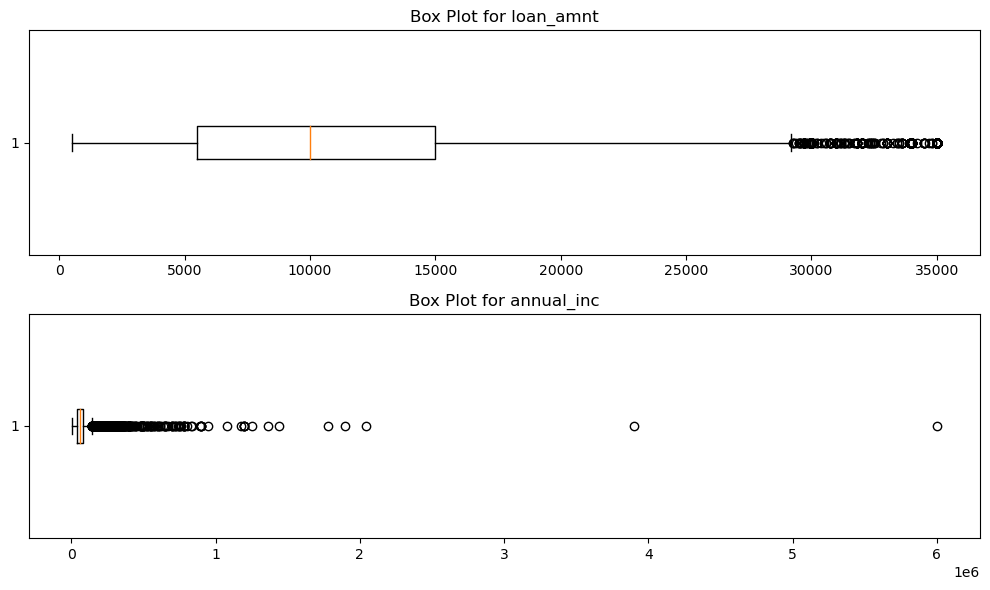

In [52]:
import matplotlib.pyplot as plt

# Calculate summary statistics for loan_amnt and annual_inc
loan_data[['loan_amnt', 'annual_inc']].describe()

# Create box plots for loan_amnt and annual_inc
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.boxplot(loan_data['loan_amnt'], vert=False)
plt.title('Box Plot for loan_amnt')

plt.subplot(2, 1, 2)
plt.boxplot(loan_data['annual_inc'], vert=False)
plt.title('Box Plot for annual_inc')

plt.tight_layout()
plt.show()


In [53]:
# Check unique values in the home_ownership and grade columns
print("Unique values in home_ownership:")
print(loan_data['home_ownership'].unique())

print("\nUnique values in grade:")
print(loan_data['grade'].unique())


Unique values in home_ownership:
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE']

Unique values in grade:
['B' 'C' 'A' 'E' 'F' 'D' 'G']


In [21]:
df.shape

(39717, 53)

In [9]:
# Identify columns with missing values
missing_values = original_df.isnull().sum()

# Loop through columns and fill missing values
for column in original_df.columns:
    if missing_values[column] > 0:
        if original_df[column].dtype == 'object':
            # For categorical columns, fill with the mode
            original_df[column].fillna(original_df[column].mode()[0], inplace=True)
        else:
            # For numeric columns, fill with the mean
            original_df[column].fillna(original_df[column].mean(), inplace=True)


In [54]:
# Impute missing values in numerical columns with the mean
numerical_columns = loan_data.select_dtypes(include=['float64', 'int64']).columns
loan_data[numerical_columns] = loan_data[numerical_columns].fillna(loan_data[numerical_columns].mean())

# Impute missing values in categorical columns with the mode
categorical_columns = loan_data.select_dtypes(include=['object']).columns
loan_data[categorical_columns] = loan_data[categorical_columns].fillna(loan_data[categorical_columns].mode().iloc[0])

# Check if there are any remaining missing values
remaining_missing = loan_data.isnull().sum().sum()
print("Remaining Missing Values:", remaining_missing)


Remaining Missing Values: 2105001


In [55]:
# Calculate the percentage of missing values in each column
missing_percentage = (loan_data.isnull().sum() / len(loan_data)) * 100

# Set a threshold for missing values (e.g., 80%)
threshold = 80

# Identify columns with missing values exceeding the threshold
high_missing_columns = missing_percentage[missing_percentage > threshold].index.tolist()

# Decide whether to drop or impute these columns
# For example, you can drop them as follows:
loan_data = loan_data.drop(columns=high_missing_columns)

# Impute missing values in remaining columns with sentinel values
# For example, you can impute missing values in numerical columns with -1
numerical_columns = loan_data.select_dtypes(include=['float64', 'int64']).columns
loan_data[numerical_columns] = loan_data[numerical_columns].fillna(-1)

# Impute missing values in categorical columns with 'Unknown'
categorical_columns = loan_data.select_dtypes(include=['object']).columns
loan_data[categorical_columns] = loan_data[categorical_columns].fillna('Unknown')

# Check if there are any remaining missing values
remaining_missing = loan_data.isnull().sum().sum()
print("Remaining Missing Values:", remaining_missing)


Remaining Missing Values: 0


In [56]:
# Identify date columns
date_columns = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d']

# Convert date columns to datetime
for col in date_columns:
    loan_data[col] = pd.to_datetime(loan_data[col], format='%b-%y', errors='coerce')


In [57]:
# Convert date columns to datetime format (if applicable)
loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'])

# Handle string columns as needed (e.g., removing special characters, converting to lowercase, etc.)
# For example, you can clean the 'term' column to extract the numeric part.
loan_data['term'] = loan_data['term'].str.extract('(\d+)').astype(int)


In [58]:
# Example: Create a new variable 'loan_to_income_ratio'
loan_data['loan_to_income_ratio'] = loan_data['loan_amnt'] / loan_data['annual_inc']

In [59]:
# Save the cleaned dataset to a new CSV file
loan_data.to_csv("cleaned_loan_data.csv", index=False)

In [60]:
loan_data = pd.read_csv('cleaned_loan_data.csv')

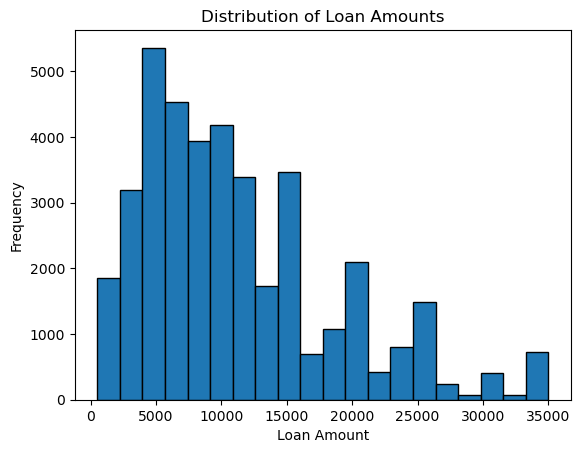

In [61]:
# Summary statistics
summary_stats = loan_data.describe()

# Histogram of loan amounts
import matplotlib.pyplot as plt
plt.hist(loan_data['loan_amnt'], bins=20, edgecolor='k')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amounts')
plt.show()


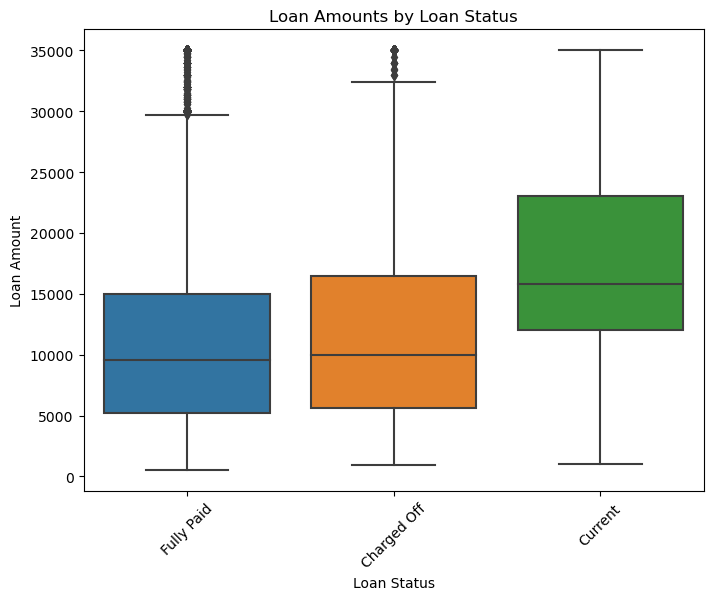

In [62]:
# Example: Box plot of loan amounts by loan status
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=loan_data)
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.title('Loan Amounts by Loan Status')
plt.xticks(rotation=45)
plt.show()


C:\Users\shahp\AppData\Local\Temp\ipykernel_29576\3952885027.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = loan_data.corr()


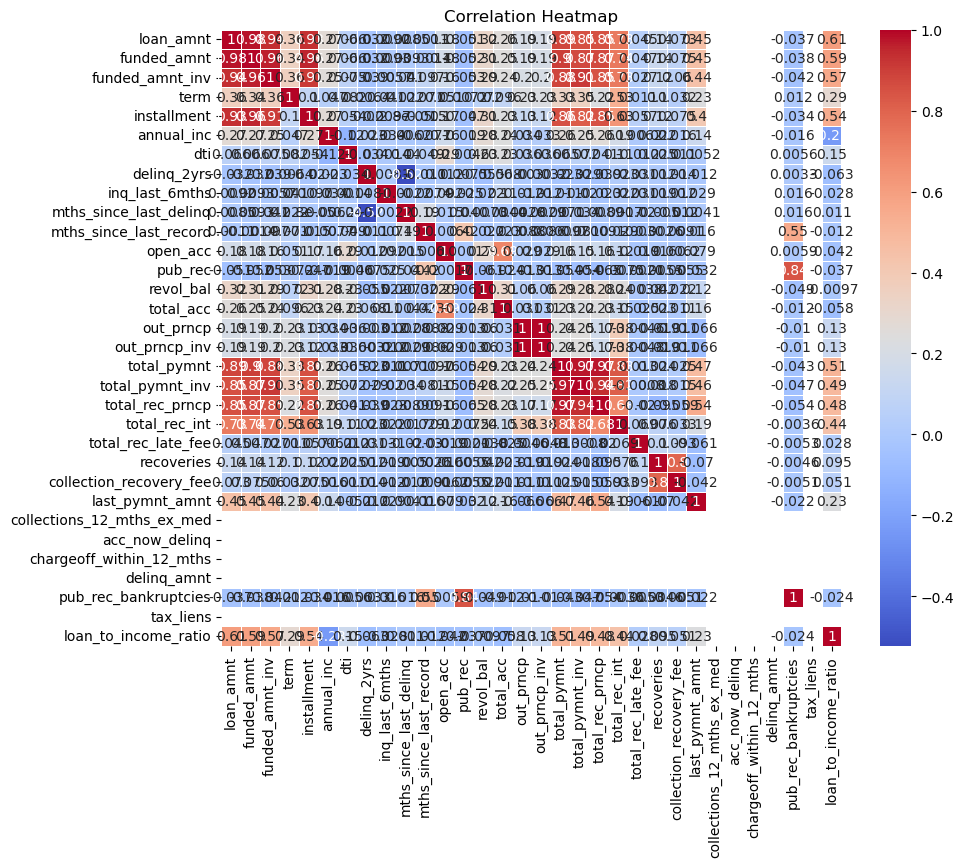

In [63]:
# Example: Correlation heatmap of numerical variables
correlation_matrix = loan_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


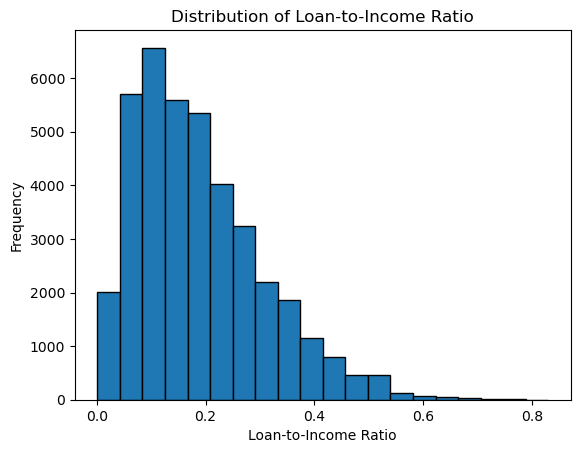

In [64]:
# Example: Analyzing the loan-to-income ratio
plt.hist(loan_data['loan_to_income_ratio'], bins=20, edgecolor='k')
plt.xlabel('Loan-to-Income Ratio')
plt.ylabel('Frequency')
plt.title('Distribution of Loan-to-Income Ratio')
plt.show()


In [ ]:
loan_data.shape[1]